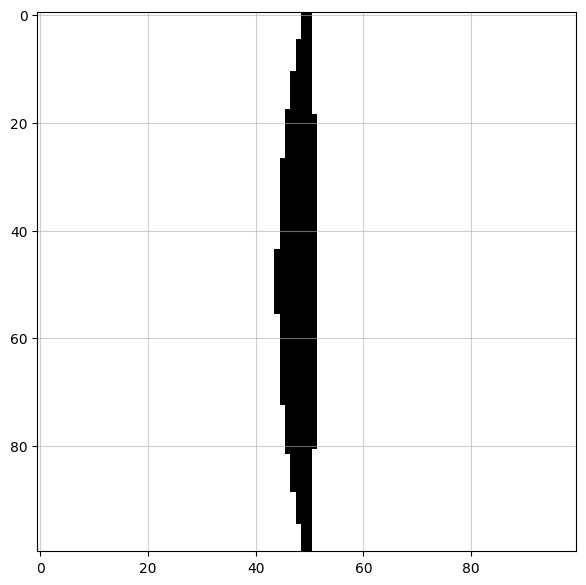

In [8]:
import matplotlib.pyplot as plt
import numpy as np


#O tamanho da matriz final. Precisa ser igual ao tamanho da tela usada na simulação
height=100
width=100
h=height

#Os raios da lente. R1 é o raio da metade esquerda e R2 é o raio da metade direita.

R1=250
R2=800

#posição horizontal do meio da lente
dist=50

def circ_func(y,R):
    global h
    global h
    d=np.sqrt(R**2 - (h**2)/4)
    return (np.sqrt(R**2 -y**2) -d)
    
        

rd=lambda x: int(np.ceil(x))


assert dist<width, 'Distância escolhida é maior que a largura'
assert height%2==0, f'Altura precisa ser um número par, mas height={height}'
assert h/2<=R1, f'R1 precisa ser menor ou igual a metade da altura, mas R1={R1} e h/2={h/2}'
assert h/2<=R2, f'R2 precisa ser menor ou igual a metade da altura, mas R2={R2} e h/2={h/2}'



lens_d=[]
lens_e=[]

w1=rd(circ_func(0,R1))
w2=rd(circ_func(0,R2))

assert dist>=w1, f'Lente muito próxima da borda direita'
assert dist+w2<=width, f'Lente muito próxima da borda esquerda'

for i in range(int(h/2)):
    sz1=rd(circ_func(i,R1))
    sz2=rd(circ_func(i,R2))

    aux1=[1 for j in range(sz1)]
    aux2=[1 for k in range(sz2)]

    res1=w1-sz1
    res2=w2-sz2

    aux1.extend([0]*res1)
    aux2.extend([0]*res2)

    lens_d.append(aux1)
    lens_e.append(aux2)

lens_d=np.concatenate((np.flip(lens_d,axis=0),lens_d))
lens_e=np.concatenate((np.flip(lens_e,axis=0),lens_e))

lens_t=np.concatenate((np.flip(lens_e,axis=1),lens_d),axis=1)
lens_t=np.flip(lens_t,axis=1)

dist=dist-w1

rem=width-dist-w2-w1

fill_1=np.zeros((height,dist))
fill_2=np.zeros((height,rem))


total=np.concatenate((fill_1,lens_t,fill_2),axis=1)

if Plot:=True:
    plt.figure(figsize=(10,7))
    plt.imshow(total,cmap='gray_r')
    plt.grid(alpha=0.6)
    plt.show()

if Save:=True:
    file_name='lens.txt'
    with open(file_name,'w') as arq:
        for line in total:
            for val in line:
                arq.write(str(val))
                arq.write(' ')
            arq.write('\n')